# **Normality Test**

Implemented from https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

### **Preparation**

In [1]:
import pandas as pd
#Load file into google colaboratory
from google.colab import files
uploaded = files.upload()

Saving normal.csv to normal.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['normal.csv']))

In [4]:
df.head(n=5)

,data
0,0.931867
1,-0.236740
2,0.484221
3,0.547303
4,-1.587330


In [5]:
df.dtypes

data    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    42 non-null     float64
dtypes: float64(1)
memory usage: 464.0 bytes


In [7]:
df.describe()

,data
count,42.000000
mean,0.127612
std,0.845596
min,-2.253135
25%,-0.437187
50%,0.261825
75%,0.636085
max,1.656814


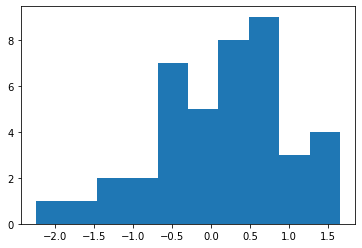

In [8]:
import matplotlib.pyplot as plt
plt.hist(df['data'])
plt.show()

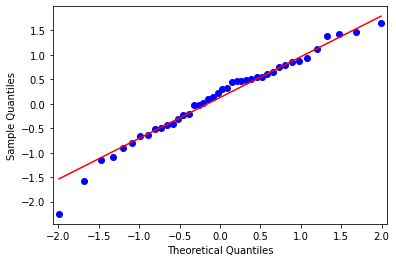

In [10]:
#Plot QQ plot
from statsmodels.graphics.gofplots import qqplot
qqplot(df['data'], line='s')
plt.show()

To read well about QQ plot you can refer to https://data.library.virginia.edu/understanding-q-q-plots/. Based on that, we have an assumption that data above normally ditributed

### **Anderson Darling**

In [11]:
from scipy.stats import anderson #import package for anderson darling
result = anderson(df['data'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


Statistic: 0.283
15.000: 0.533, data looks normal (fail to reject H0)
10.000: 0.607, data looks normal (fail to reject H0)
5.000: 0.728, data looks normal (fail to reject H0)
2.500: 0.849, data looks normal (fail to reject H0)
1.000: 1.010, data looks normal (fail to reject H0)


### **Shapiro Wilk**

In [14]:
from scipy.stats import shapiro
stat, p_value = shapiro(df['data'])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.977, p=0.000
Sample looks Gaussian (fail to reject H0)


### **D'Agustinus K2**

In [15]:
from scipy.stats import normaltest
stat, p = normaltest(df['data'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=2.755, p=0.252
Sample looks Gaussian (fail to reject H0)


**Based on the test above, we can conclude that data is not normally distributed**